<a href="https://colab.research.google.com/github/Yuyan-C/BigDataChallenge-Team26/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## extracting text


In [ ]:
import pandas as pd
df1 = pd.read_csv("COVID Fake News Data.csv")
df2 = pd.read_excel("fake_new_dataset.xlsx")

In [ ]:
df1.head(5)
x1 = df1["headlines"].tolist()
y1 = df1["outcome"].tolist()
df2.head(5)
x2 = df3["text"].tolist()
y2 = df3["label"].tolist()

In [ ]:
x = x1 + x2
y = y1 + y2

## cleaning dataset

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

In [ ]:
def clean(text):
  text = text.lower()
  text = re.sub('[^a-zA-Z]',' ', text)
  text_tokens = word_tokenize(text)
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  cleaned_news = ' '.join(tokens_without_sw)
  return cleaned_news


In [ ]:
new_x = list()
new_y = list()

for index, text in enumerate(x):
  if isinstance(text, str):
    new_x.append(text)
    new_y.append(y[index])


In [ ]:
from datetime import datetime
print(datetime.now())
X = [clean(s) for s in new_x]
print(datetime.now())

2021-05-27 11:02:54.765985
2021-05-27 12:47:06.033354


In [ ]:
cleaned = pd.DataFrame()
cleaned["X"] = X
cleaned["y"] = new_y
cleaned.to_csv("cleaned_dataset.csv")

## loading cleaned dataset


In [ ]:
!wget -O "cleaned_dataset.csv" https://www.dropbox.com/s/rysh108jagadzwi/cleaned_dataset.csv?dl=0
import pandas as pd
df = pd.read_csv("cleaned_dataset.csv")
X = df["X"].tolist()
y = df["y"]

from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
from sklearn.feature_extraction.text import TfidfVectorizer

## TfidfVectorizer

In [4]:
vectorizer = TfidfVectorizer(max_features = 10000, lowercase = False, ngram_range = (1,2))
vec_train_data = vectorizer.fit_transform(X_train_text)
vec_train_data = vec_train_data.toarray()
vec_test_data = vectorizer.transform(X_test_text).toarray()
X_train = vec_train_data
X_test = vec_test_data

## visualization

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
index_fake, index_real = [] , []
for i, v in enumerate(y):
  if v == 0:
    index_fake.append(i)
  else:
    index_real.append(i)

fake_text, real_text = [], []
for i in index_fake:
  fake_text.append(X[i])
for i in index_real:
  real_text.append(X[i])


In [6]:
vec_fake = vectorizer.fit_transform(fake_text)
vec_real = vectorizer.fit_transform(real_text)
names = vectorizer.get_feature_names()

In [7]:
dense0 = vec_fake.todense().tolist()
dense1 = vec_real.todense().tolist()
df0 = pd.DataFrame(dense0, columns=names)
df1 = pd.DataFrame(dense1, columns=names)


(-0.5, 399.5, 199.5, -0.5)

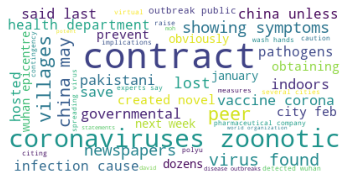

In [17]:
sum0 = df0.T.sum(axis=1)
Cloud0 = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df0.T.sum(axis=1))
plt.imshow(Cloud0)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

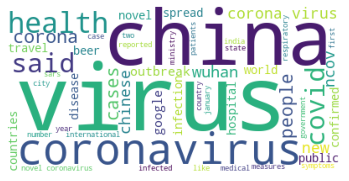

In [18]:
sum1 = df1.T.sum(axis=1)
Cloud1 = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df1.T.sum(axis=1))
plt.imshow(Cloud1)
plt.axis("off")

In [32]:
sum0 = sum0.sort_values(ascending=False)
sum1 = sum1.sort_values(ascending=False)

In [69]:
top0, fake0, real0 = [], [], []
for i in sum0[:10].index:
  top0.append(i)
  fake0.append(sum0[i])
  real0.append(sum1[i])
print(top0)
print(fake0)
print(real0)

top1, fake1, real1 = [], [], []
for i in sum1[:10].index:
  top1.append(i)
  fake1.append(sum0[i])
  real1.append(sum1[i])
print(top1)
print(fake1)
print(real1)

['contract', 'coronaviruses zoonotic', 'peer', 'villages', 'china may', 'virus found', 'showing symptoms', 'newspapers', 'lost', 'pakistani']
[463.744099114405, 408.7594008908968, 189.8687311897816, 183.1699395667223, 151.87723015868687, 147.78726066922292, 133.97088593047368, 131.77498709619778, 119.32597466496541, 108.76292421151977]
[1.8639489962016644, 0.47180946172641247, 0.6898023133226239, 0.7697990319120591, 0.9296497700349367, 1.582851167251958, 3.035241209588226, 1.378697081688656, 2.819425313131058, 3.079782382341032]
['virus', 'china', 'coronavirus', 'health', 'said', 'covid', 'corona', 'people', 'cases', 'wuhan']
[3.338726993121463, 2.3395955201510104, 2.2620661351644804, 3.309763993410326, 2.846661929976687, 4.105687515927361, 40.12144955204478, 7.686402917998002, 0.503402541220784, 0.5371914747540951]
[115.79554431542817, 108.06641109518513, 98.21333277419325, 87.0698883930147, 78.59345778145713, 72.46774102127243, 72.13949088362358, 68.53026975452255, 67.2400774024074, 

Text(0.5, 0, 'tf-idf sum')

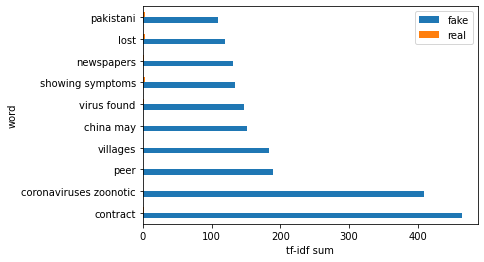

In [72]:
compare0 = pd.DataFrame()
compare0["word"] = top0
compare0["fake"] = fake0
compare0["real"] = real0
compare0.plot(x="word", y=["fake", "real"], kind="barh")
plt.xlabel("tf-idf sum")


In [75]:
print(compare0)

                     word        fake      real
0                contract  463.744099  1.863949
1  coronaviruses zoonotic  408.759401  0.471809
2                    peer  189.868731  0.689802
3                villages  183.169940  0.769799
4               china may  151.877230  0.929650
5             virus found  147.787261  1.582851
6        showing symptoms  133.970886  3.035241
7              newspapers  131.774987  1.378697
8                    lost  119.325975  2.819425
9               pakistani  108.762924  3.079782


Text(0.5, 0, 'tf-idf sum')

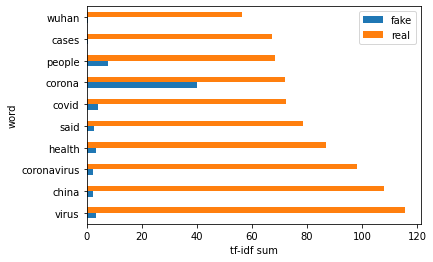

In [73]:
compare1 = pd.DataFrame()
compare1["word"] = top1
compare1["fake"] = fake1
compare1["real"] = real1
compare1.plot(x="word", y=["fake", "real"], kind="barh")
plt.xlabel("tf-idf sum")

In [74]:
print(compare1)

          word       fake        real
0        virus   3.338727  115.795544
1        china   2.339596  108.066411
2  coronavirus   2.262066   98.213333
3       health   3.309764   87.069888
4         said   2.846662   78.593458
5        covid   4.105688   72.467741
6       corona  40.121450   72.139491
7       people   7.686403   68.530270
8        cases   0.503403   67.240077
9        wuhan   0.537191   56.398782


# Training Model

In [101]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from joblib import dump, load


## Naive Bayes


In [91]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
dump(clf_nb, 'clf_nb.joblib')

In [92]:
prob_nb = clf_nb.predict_proba(X_test)
print(prob_nb)

[[0.98731337 0.01268663]
 [0.99733441 0.00266559]
 [0.06509809 0.93490191]
 ...
 [0.95049059 0.04950941]
 [0.93168904 0.06831096]
 [0.98936421 0.01063579]]


In [93]:
count = 0
for i in prob_nb:
  if i[0] > 0.90 or i[1] > 0.90:
    count += 1
print(count/ len(prob_nb))

0.7552552552552553


In [94]:
index_fake_confident, index_real_confident = [], []

for index, value in enumerate(prob_nb):
  if value[0] > 0.9:
    index_fake_confident.append(index)
  if value[1] > 0.9:
    index_real_confident.append(index)


In [96]:
text_fake_confident, text_real_confident = [], []

for i in index_fake_confident:
  text_fake_confident.append(X_test_text[i])

for i in index_real_confident:
  text_real_confident.append(X_test_text[i])


In [97]:
print(len(text_fake_confident))
print(len(text_real_confident))

1757
255


In [98]:
df1 = pd.DataFrame()
df1["fake"] = text_fake_confident
df1.to_csv("fake_nb_pred.csv")

df2 = pd.DataFrame()
df2["real"] = text_real_confident
df2.to_csv("real_nb_pred.csv")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2171
           1       0.81      0.71      0.76       493

    accuracy                           0.92      2664
   macro avg       0.87      0.84      0.85      2664
weighted avg       0.91      0.92      0.91      2664



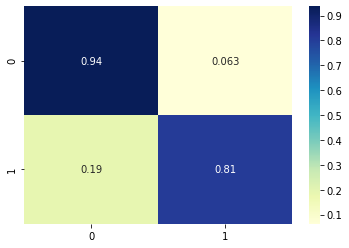

In [99]:
print(classification_report(y_test, y_pred_nb))
y_pred_nb = np.array(y_pred_nb)
y_test = np.array(y_test)
cf_matrix_nb = confusion_matrix(y_pred_nb, y_test)
sum = np.sum(cf_matrix_nb,axis=1)
cf_matrix_nb = cf_matrix_nb / sum[:,None]
sns.heatmap(cf_matrix_nb, annot=True,cmap="YlGnBu")
plt.show()

## Random Forest


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2171
           1       0.83      0.76      0.79       493

    accuracy                           0.93      2664
   macro avg       0.89      0.86      0.88      2664
weighted avg       0.93      0.93      0.93      2664



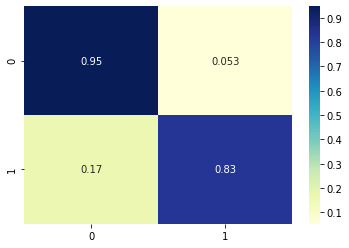

In [123]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
dump(clf_rf, 'clf_rf.joblib')
print(classification_report(y_test, y_pred_rf))
y_pred_rf = np.array(y_pred_rf)
y_test = np.array(y_test)
cf_matrix_rf = confusion_matrix(y_pred_rf, y_test)
sum = np.sum(cf_matrix_rf,axis=1)
cf_matrix_rf = cf_matrix_rf / sum[:,None]
sns.heatmap(cf_matrix_rf, annot=True,cmap="YlGnBu")
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2171
           1       0.83      0.69      0.75       493

    accuracy                           0.92      2664
   macro avg       0.88      0.83      0.85      2664
weighted avg       0.91      0.92      0.91      2664



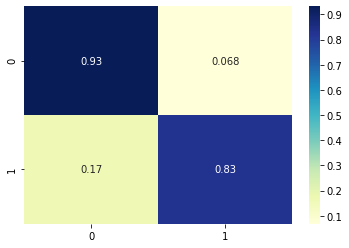

In [111]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
dump(clf_lr, 'clf_lr.joblib')

y_pred_lr = clf_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
y_pred_lr = np.array(y_pred_lr)
y_test = np.array(y_test)
cf_matrix_lr = confusion_matrix(y_pred_lr, y_test)
sum = np.sum(cf_matrix_lr,axis=1)
cf_matrix_lr = cf_matrix_lr / sum[:,None]
sns.heatmap(cf_matrix_lr, annot=True,cmap="YlGnBu")
plt.show()